In [1]:
#X = Parametros entrada, p ej Criminalidad, Habitaciones, Servicios
#Y = Parametro Salida Unico p ej  Precio vivienda
#El objetivo es ver si los de entrada influyen en el de salida mirando la correlacion, si al aumentar uno afecta al otro, se vera demostrado
#W = Parametros de funcion de pendiente W0 = desfase, W1 = Pendiente

#Y = XW, sin embargo, no tenemos W

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\usera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

[-34.67062078   9.10210898]


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

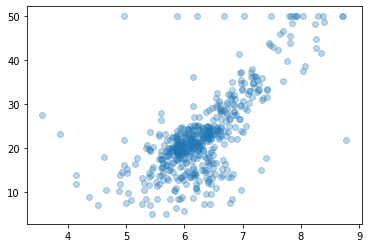

In [2]:
#Minimo error cuadratico medio, osea, minimos cuadrados ordinarios
#Estima la recta con menor distancia entre los puntos usando la varianza
#Es una funcion convexa, al ser cuadratica
#Es algo ineficiente, ya que trasponer es costoso matematicamente
#W = (X.TX)-1  (XTY)
#debe tener una columna de 1 en la primera columna para el termino independiente

X = np.array(boston.data[:,5])
Y = np.array(boston.target)
plt.scatter(X,Y,alpha = 0.3)
#Añadir columna de 1
X = np.array([np.ones(506),X]).T

B = np.linalg.inv(X.T@X) @X.T@Y
print(B)#da los dos elementos, el primero es el desfase W0, y el segundo es la pendiente W1

plt.plot([4,9] , B[0] + B[1]*4, B[0] + B[1]*9, c = "red")
plt.show()